In [1]:
from imutils.perspective import four_point_transform
from imutils import contours 
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [54]:
answerKey = {0: 1,
            1:4,
            2:0,
            3:3,
            4:1}

img = cv2.imread('data/omr_test_01.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5), 0)
edged = cv2.Canny(blurred, 75, 200)

cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
docCnt = None

if len(cnts) > 0:
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    
    for c in cnts:
        print(c)
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02*peri, True)
        
        if len(approx) == 4:
            docCnt = approx
            break
            
paper = four_point_transform(img, docCnt.reshape(4,2))
warped = four_point_transform(gray, docCnt.reshape(4,2))

thresh = cv2.threshold(warped, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

questionCnts = []

for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    
    if w>= 20 and h >= 20 and ar >= 0.9 and ar<= 1.1:
        questionCnts.append(c)
        
questionCnts = contours.sort_contours(questionCnts, method='top-to-bottom')[0]
correct = 0

for (q, i) in enumerate(np.arange(0, len(questionCnts), 5)):
    cnts = contours.sort_contours(questionCnts[i:i +5])[0]
    bubbled = None
    for (j, c) in enumerate(cnts):
        mask = np.zeros(thresh.shape, dtype='uint8')
        cv2.drawContours(mask, [c], -1, 255, -1)

        mask = cv2.bitwise_and(thresh, thresh, mask=mask)
        total = cv2.countNonZero(mask)

        if bubbled is None or total > bubbled[0]:
            bubbled = (total, j)
            
    color = (255, 0, 0)
    k = answerKey[q]
    # check to see if the bubbled answer is correct
    if k == bubbled[1]:
        color = (0, 255, 0)
        correct += 1
    # draw the outline of the correct answer on the test
    cv2.drawContours(paper, [cnts[k]], -1, color, 3)

score = (correct / 5.0) * 100
print("[INFO] score: {:.2f}%".format(score))
cv2.putText(paper, "{:.2f}%".format(score), (10, 30),
cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)



[[[133 205]]

 [[132 206]]

 [[131 206]]

 [[131 239]]

 [[130 240]]

 [[130 272]]

 [[129 273]]

 [[129 296]]

 [[128 297]]

 [[128 319]]

 [[127 320]]

 [[127 366]]

 [[126 367]]

 [[126 402]]

 [[125 403]]

 [[125 425]]

 [[124 426]]

 [[124 456]]

 [[123 457]]

 [[123 492]]

 [[122 493]]

 [[122 520]]

 [[121 521]]

 [[121 551]]

 [[120 552]]

 [[120 583]]

 [[119 584]]

 [[119 617]]

 [[129 617]]

 [[130 618]]

 [[189 618]]

 [[190 617]]

 [[219 617]]

 [[220 616]]

 [[276 616]]

 [[277 615]]

 [[407 615]]

 [[408 616]]

 [[409 616]]

 [[410 615]]

 [[441 615]]

 [[442 614]]

 [[448 614]]

 [[448 594]]

 [[447 593]]

 [[447 571]]

 [[446 570]]

 [[446 553]]

 [[445 552]]

 [[445 537]]

 [[444 536]]

 [[444 519]]

 [[443 518]]

 [[443 499]]

 [[442 498]]

 [[442 477]]

 [[441 476]]

 [[441 457]]

 [[440 456]]

 [[440 436]]

 [[439 435]]

 [[439 415]]

 [[438 414]]

 [[438 384]]

 [[437 383]]

 [[437 348]]

 [[436 347]]

 [[436 322]]

 [[435 321]]

 [[435 308]]

 [[434 307]]

 [[434

array([[[134, 157, 170],
        [228, 249, 250],
        [217, 239, 243],
        ...,
        [144, 157, 166],
        [152, 162, 169],
        [129, 139, 144]],

       [[121, 143, 153],
        [222, 240, 243],
        [216, 235, 238],
        ...,
        [241, 243, 244],
        [245, 246, 247],
        [237, 240, 239]],

       [[103, 125, 133],
        [206, 225, 231],
        [204, 221, 226],
        ...,
        [247, 249, 248],
        [253, 254, 254],
        [230, 235, 234]],

       ...,

       [[140, 164, 176],
        [174, 201, 213],
        [156, 182, 194],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [198, 196, 196]],

       [[157, 181, 193],
        [191, 219, 231],
        [173, 201, 212],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [230, 226, 229]],

       [[ 90, 110, 123],
        [120, 140, 156],
        [111, 131, 145],
        ...,
        [206, 200, 202],
        [202, 198, 202],
        [179, 176, 181]]

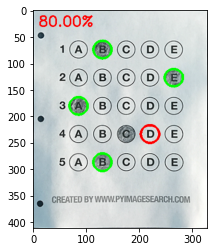

In [55]:
plt.imshow(paper)

In [40]:
score = (correct / 5.0) * 100
print("[INFO] score: {:.2f}%".format(score))
cv2.putText(paper, "{:.2f}%".format(score), (10, 30),
cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
cv2.imshow("Original", img)
cv2.imshow("Exam", paper)
cv2.waitKey(0)

[INFO] score: 80.00%


27

In [41]:
cv2.destroyAllWindows()

In [117]:
image = cv2.imread('data/omr_test_01.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 75, 200)

In [118]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
docCnt = None
# ensure that at least one contour was found
if len(cnts) > 0:
	# sort the contours according to their size in
	# descending order
	cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
	# loop over the sorted contours
	for c in cnts:
		# approximate the contour
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.02 * peri, True)
		# if our approximated contour has four points,
		# then we can assume we have found the paper
		if len(approx) == 4:
			docCnt = approx
			break
            

In [119]:
paper = four_point_transform(image, docCnt.reshape(4, 2))
warped = four_point_transform(gray, docCnt.reshape(4, 2))

In [120]:
thresh = cv2.threshold(warped, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

In [121]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
questionCnts = []
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour, then use the
	# bounding box to derive the aspect ratio
	(x, y, w, h) = cv2.boundingRect(c)
	ar = w / float(h)
	# in order to label the contour as a question, region
	# should be sufficiently wide, sufficiently tall, and
	# have an aspect ratio approximately equal to 1
	if w >= 20 and h >= 20 and ar >= 0.9 and ar <= 1.1:
		questionCnts.append(c)

In [122]:
questionCnts = contours.sort_contours(questionCnts,
	method="top-to-bottom")[0]
correct = 0
# each question has 5 possible answers, to loop over the
# question in batches of 5
for (q, i) in enumerate(np.arange(0, len(questionCnts), 5)):
	# sort the contours for the current question from
	# left to right, then initialize the index of the
	# bubbled answer
	cnts = contours.sort_contours(questionCnts[i:i + 5])[0]
	bubbled = None

In [123]:
	for (j, c) in enumerate(cnts):
		# construct a mask that reveals only the current
		# "bubble" for the question
		mask = np.zeros(thresh.shape, dtype="uint8")
		cv2.drawContours(mask, [c], -1, 255, -1)
		# apply the mask to the thresholded image, then
		# count the number of non-zero pixels in the
		# bubble area
		mask = cv2.bitwise_and(thresh, thresh, mask=mask)
		total = cv2.countNonZero(mask)
		# if the current total has a larger number of total
		# non-zero pixels, then we are examining the currently
		# bubbled-in answer
		if bubbled is None or total > bubbled[0]:
			bubbled = (total, j)
            
            

In [125]:
	color = (0, 0, 255)
	k = answerKey[q]
	# check to see if the bubbled answer is correct
	if k == bubbled[1]:
		color = (0, 255, 0)
		correct += 1
	# draw the outline of the correct answer on the test
	cv2.drawContours(paper, [cnts[k]], -1, color, 3)

array([[[134, 157, 170],
        [228, 249, 250],
        [217, 239, 243],
        ...,
        [144, 157, 166],
        [152, 162, 169],
        [129, 139, 144]],

       [[121, 143, 153],
        [222, 240, 243],
        [216, 235, 238],
        ...,
        [241, 243, 244],
        [245, 246, 247],
        [237, 240, 239]],

       [[103, 125, 133],
        [206, 225, 231],
        [204, 221, 226],
        ...,
        [247, 249, 248],
        [253, 254, 254],
        [230, 235, 234]],

       ...,

       [[140, 164, 176],
        [174, 201, 213],
        [156, 182, 194],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [198, 196, 196]],

       [[157, 181, 193],
        [191, 219, 231],
        [173, 201, 212],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [230, 226, 229]],

       [[ 90, 110, 123],
        [120, 140, 156],
        [111, 131, 145],
        ...,
        [206, 200, 202],
        [202, 198, 202],
        [179, 176, 181]]

In [126]:
# grab the test taker
score = (correct / 5.0) * 100
print("[INFO] score: {:.2f}%".format(score))
cv2.putText(paper, "{:.2f}%".format(score), (10, 30),
	cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
cv2.imshow("Original", image)
cv2.imshow("Exam", paper)
cv2.waitKey(0)

[INFO] score: 20.00%


27